# Laboratorio 7

Diego Córdova (20), Cristian Aguirre (20) y Paola De León (20361)

### Exploración de datos

In [31]:
# !pip install quickda sklearn

In [32]:
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *

data = pd.read_csv('./bank_transactions.csv')
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


Outlier Analysis - Boxplot


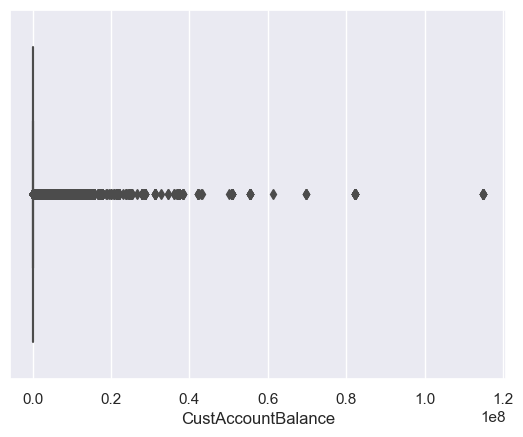

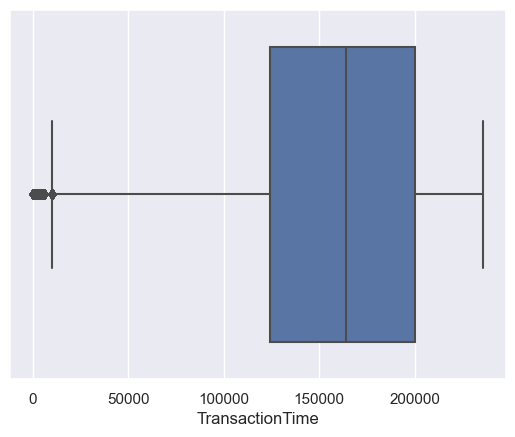

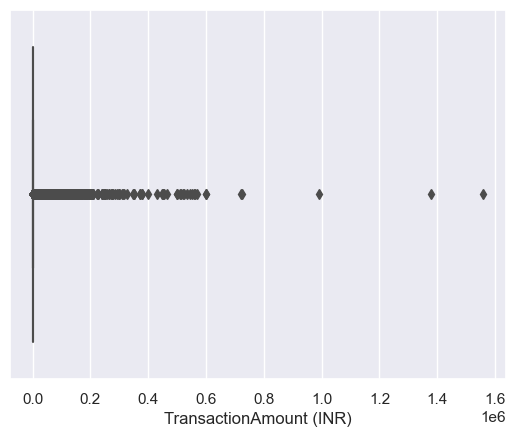

Distribution Analysis - Histogram


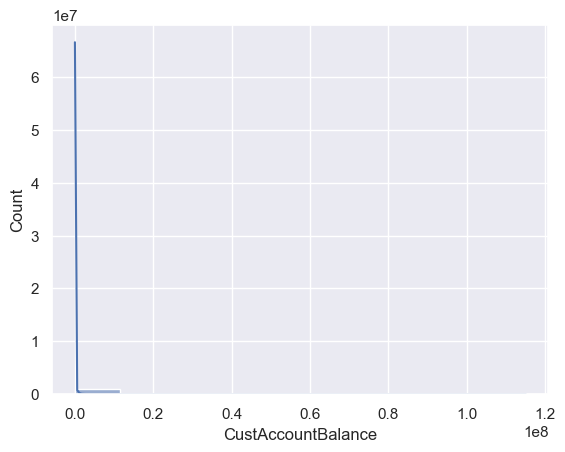

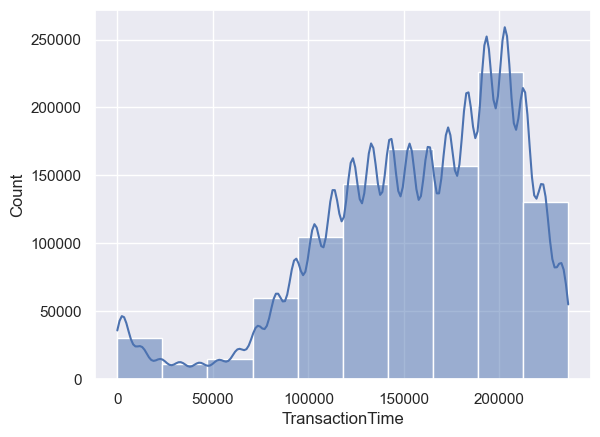

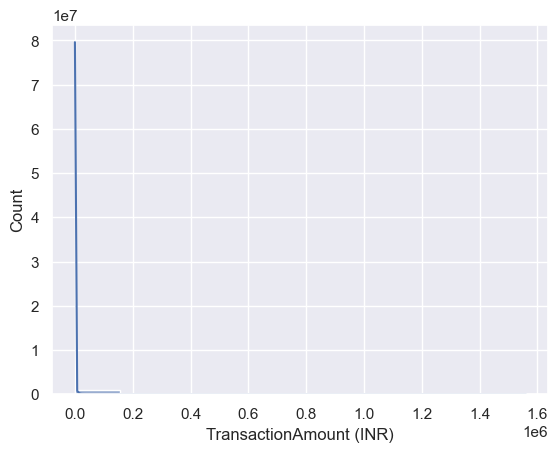

In [33]:
eda_num(data)

In [34]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


c:\Users\crist\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\crist\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,CustAccountBalance,TransactionTime,TransactionAmount (INR)
CustAccountBalance,1.00,-0.00,0.06
TransactionTime,-0.00,1.00,0.01
TransactionAmount (INR),0.06,0.01,1.00


<AxesSubplot: >

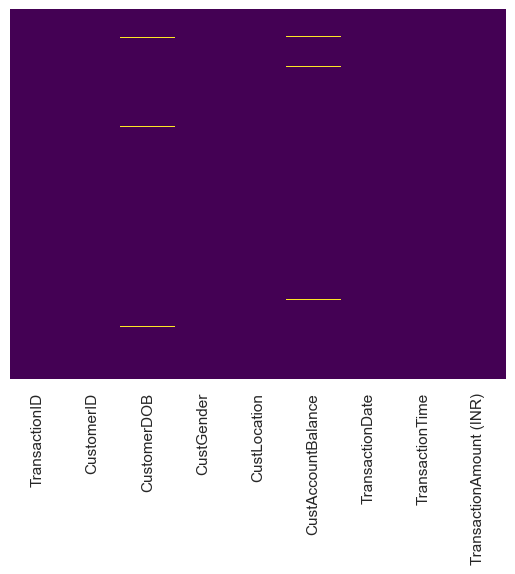

In [35]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

- Encoding de variables

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['CustGender'] = encoder.fit_transform(data['CustGender'])
data['CustLocation'] = encoder.fit_transform(data['CustLocation'])

data[['CustGender', 'CustLocation']].head()


,CustGender,CustLocation
0,0,3586
1,1,3648
2,0,5268
3,0,5268
4,0,5657


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1048567 non-null  int32  
 4   CustLocation             1048567 non-null  int32  
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 64.0+ MB


In [38]:
data = data.dropna()

In [39]:
new_values = []
for index in range(data.shape[0]):
    year_value = str(data.iloc[index, 2]).split('/')[2]
    year_value = int('19' + year_value) if len(year_value) == 2 else int(year_value)
    new_values.append(year_value)

data['CustomerDOB'] = new_values
data[['CustomerDOB']].head()

C:\Users\crist\AppData\Local\Temp\ipykernel_14420\2986645118.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerDOB
0,1994
1,1957
2,1996
3,1973
4,1988


In [40]:
new_values = []
for index in range(data.shape[0]):
    month = int(str(data.iloc[index, 6]).split('/')[1])
    new_values.append(month)

data['TransactionMonth'] = new_values
data[['TransactionMonth']]

C:\Users\crist\AppData\Local\Temp\ipykernel_14420\461611138.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TransactionMonth
0,8
1,8
2,8
3,8
4,8
...,...
1048562,9
1048563,9
1048564,9
1048565,9


- Revisar si el dataset se encuentra balanceado

In [41]:
# Compute class counts
# class_counts = df['target_column'].value_counts()

# Identify the minority class
# minority_class = class_counts.idxmin()

# Undersample the majority class
# majority_class = class_counts.idxmax()
# majority_class_samples = df[df['target_column'] == majority_class].sample(n=class_counts[minority_class])
# df_balanced = pd.concat([df[df['target_column'] == minority_class], majority_class_samples])


In [42]:
# CustomerDOB
# CustAccountBalance
# TransactionTime
# TransactionAmount
# TransactionAmount

column = data.columns[7]
class_counts = data[column].value_counts()
print(class_counts)


195002    46
193303    46
202738    46
202709    45
195708    45
          ..
45027      1
40645      1
41247      1
42009      1
71955      1
Name: TransactionTime, Length: 81863, dtype: int64


- Escalar variables

In [43]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'TransactionMonth'],
      dtype='object')

- Selección de variables

In [44]:
data = data.drop(columns=[
    'CustomerID',
    'TransactionID',
    'TransactionDate',
])
data.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),TransactionMonth
0,1994,0,3586,17819.05,143207,25.0,8
1,1957,1,3648,2270.69,141858,27999.0,8
2,1996,0,5268,17874.44,142712,459.0,8
3,1973,0,5268,866503.21,142714,2060.0,8
4,1988,0,5657,6714.43,181156,1762.5,8


## Task 1.1 - K Means

Segmentación de clientes utilizando aprendizaje no supervizado.

### Implementación de grupo

- Split del dataset (Si se considera necesario)

In [45]:
X = data[["CustAccountBalance", "TransactionAmount (INR)"]]
X

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
1,2270.69,27999.0
2,17874.44,459.0
3,866503.21,2060.0
4,6714.43,1762.5
...,...,...
1048562,7635.19,799.0
1048563,27311.42,460.0
1048564,221757.06,770.0
1048565,10117.87,1000.0


In [46]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X = normalizador.fit_transform(X)
X

array([[-0.11471756, -0.23496342],
       [-0.13309002,  4.02956233],
       [-0.11465211, -0.16880184],
       ...,
       [ 0.1262624 , -0.12139111],
       [-0.12381754, -0.08632852],
       [-0.04628283, -0.06102248]])

- Selección de cantidad de clusters y justificación

In [47]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, K=7, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Lista de indices para cada cluster
        self.clusters = [[] for _ in range(self.K)]
        self.centroides=None
    
    def train(self, X):
        # inicializamos los centroides al azar
        centroides = np.random.rand(self.K,X.shape[1])
        centroids_old = centroides.copy()
        print(centroides)

        for _ in range(self.max_iters):
            distance=None
            for sample in range(1,self.K):
                distance = self.euclidian_distance(X, centroides)
            samples = np.argmin(distance,axis=1) 
            # asignar los datos al centroide mas cercano
            for sample in set(samples):
                centroides[sample,:] = self._get_clusters_labels( X, samples, sample)
            #Si los centroides convergen, 
            if self._is_converged(centroids_old, centroides):
                break
        self.centroides = centroides


    def predict(self, X):
        distance = None
        for sample in range(1,self.K):
            distance = self.euclidian_distance(X, self.centroides)
        return self._get_centroids(distance)
        

    def _get_clusters_labels(self, X,samples, sample):
        # clusters=7
        # # each sample will get the label of the cluster it was assigned to
        # labels = np.empty(self.K)
        # for cluster_idx, cluster in enumerate(clusters):
        #     for sample_idx in cluster:
        #         labels[sample_idx] = cluster_idx

        return np.mean(X[samples == sample,:],axis=0)

    def _create_clusters(self, centroids):
        pass
        # # Empezamos con una lista vacia para cada cluster
        # clusters = [[] for _ in range(self.K)]
        # for indice, muestra in enumerate(self.X):
        #     centroid_index = self._closest_centroid(muestra, centroids)
        #     clusters[centroid_index].append(indice)
        # return clusters


    def _get_centroids(self, distance):
        # Asigna el valor medio de los clusters a los centroides
        # centroids = np.zeros((self.K, self.n_features))
        
        return np.argmin(distance,axis=1)

    def _is_converged(self, centroids_old, centroids):
        # distancias entre viejos y nuevos centroides
        result = np.linalg.norm(centroids - centroids_old) < 1e-3
        return result
    
    
    def euclidian_distance(self, X, centroides):
        return np.linalg.norm(X - centroides[0,:],axis=1).reshape(-1,1)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroides:
            ax.scatter(*point, marker='x', color='black', linewidth=2)

        plt.show()

In [48]:
from kmeans3 import KMeans_NoLibreria

k = KMeans()

In [49]:
k.train(X)

[[0.21676246 0.83730791]
 [0.40524588 0.34619444]
 [0.30873839 0.63853584]
 [0.20922795 0.42129516]
 [0.78941551 0.69922579]
 [0.4777612  0.22513954]
 [0.77370257 0.08538434]]


In [50]:
y_pred = k.predict(X)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

-> 

- Investigación de PCA ¿Cómo puede ayudarnos a mejorar la calidad de nuestros clusters?

-> 

- Gráfica de segmentación

(-2.0, 50.0)

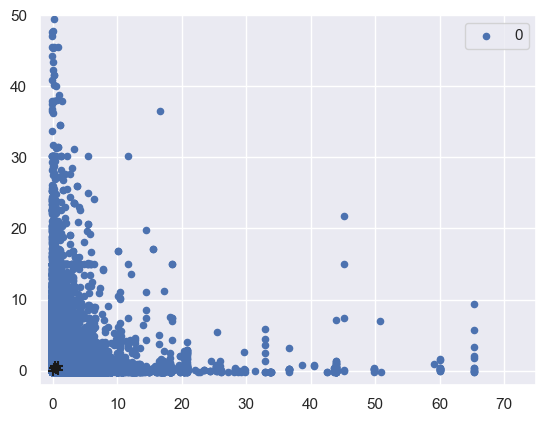

In [52]:
u_labels = list(np.unique(y_pred))
for i in u_labels:
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], s = 20, label = i)
plt.scatter(k.centroides[:,0],k.centroides[:,1],s = 50, c = 'k',marker = '+')
plt.legend()
plt.xlim(-2, 75)
plt.ylim(-2, 50)

- Métrica de desempeño con justificación

In [56]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


calinskiHarabasz = calinski_harabasz_score(X, y_pred)
print("Calinski Harabasz: ", calinskiHarabasz)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

->

### Implentación con librerías

- Split del data set (Si se considera necesario)

- Selección de cantidad de clusters

- Gráfica de segmentación

- Métrica de desempeño con justificación

-> 

EN READ ME -> ¿Cuál implementación fue la mejor? ¿Por qué?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cda2513-019c-4ccf-8801-f1df0e7af21a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>